### **Proyecto 1 - Coding Dojo**

####**Food sales prediction**

**Elaborado por:** Fabian Villarreal Sosa

#### **Variables**

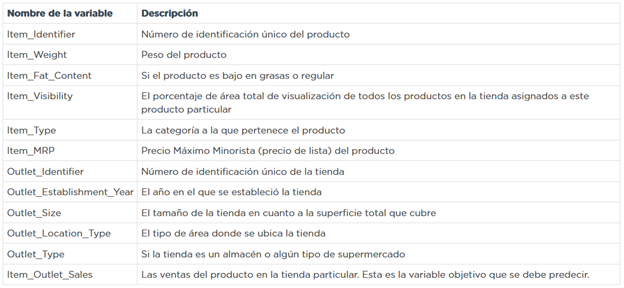

#### **Parte 3**

Semana 3

Continuaremos trabajando en tu proyecto de predicción de ventas. El objetivo es ayudar a la tienda a comprender las propiedades de los productos y establecimientos que tienen un rol crucial en aumentar las ventas.

Para la Parte 3, tu tarea es construir varias visualizaciones de datos que te ayuden a entender mejor los datos y que ayuden a las partes interesadas a entender mejor las tendencias en los datos. Siéntete libre de dejarte llevar por tu creatividad esta semana, esta es tu oportunidad de establecer tu proyecto a parte de otros con análisis y visualizaciones excepcionales.

* Usa los datos que limpiaste la semana pasada. Si es necesario, puedes descargar los datos oiriginales. (Nota: Original data source) https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/
* Crea varias visualizaciones de datos que te ayuden a entender mejor los datos con los que estás trabajando (análisis exploratorio de datos) y que ayude a otras personas entender las tendencias en los datos (análisis explicativo de datos).

#### **Parte 4**

Semana 4

Continuaremos trabajando en tu proyecto de predicción de ventas. El objetivo es ayudar a la tienda a comprender las propiedades de los productos y establecimientos que tienen un rol crucial en aumentar las ventas.

Para la parte 4, tu tarea es completar cualquier análisis estadístico que te podría ayudar a entender, explicar o modelar tus datos. Esto podría incluir:

* Histogramas para ver la distribución de varias características en tu conjunto de datos.
* Diagramas de caja para ver los resúmenes estadísticos de varias características en tu conjunto de datos.
* Bonus: mapas de calor de las correlaciones entre características
* Cualquier cosa que quieras continuar refinando para el proyecto (siéntete libre de continuar con los trabajos de las semanas anteriores que no tuviste tiempo para completar).

#### **Datos**

In [54]:
# !pip install gwpy matplotlib~=3.5.0;

In [1]:
### Librerias
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

from google.colab import drive

In [2]:
### Acceder a directorio en Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
### Determinar directorio
os.chdir('/content/drive/MyDrive/Coding Dojo/Proyecto 1')
os.getcwd()

'/content/drive/MyDrive/Coding Dojo/Proyecto 1'

In [4]:
### Cargar los datos
df=pd.read_csv('sales_predictions.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### **Cleaning and data mining**

In [5]:
### Data structure information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.shape

(8523, 12)

In [7]:
### Descriptive statistics
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
### Columns with missing values
columnas_nan=df.columns[df.isna().any()] # Columns that have at least one missing value
columnas_nan

Index(['Item_Weight', 'Outlet_Size'], dtype='object')

In [9]:
### Number of missing values
print(df[columnas_nan].isna().sum())
print('\nPercentage\n')
print(round(df[columnas_nan].isna().sum()/df.shape[0]*100,2))

Item_Weight    1463
Outlet_Size    2410
dtype: int64

Percentage

Item_Weight    17.17
Outlet_Size    28.28
dtype: float64


In [10]:
### Get the average value of the weight of each product by its ID to replace the missing values
df['Item_Weight']=df.groupby(['Item_Identifier'])['Item_Weight'].transform(lambda x: x.fillna(x.mean()))
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [11]:
df['Item_Weight'].isna().sum() # Now the variable has less missing data
df[df['Item_Weight'].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [12]:
### Remove rows where product weight has missing value 
df=df[df['Item_Weight'].notna()]

#### **Data exploration**

In [13]:
### Plot histogram of numerical variables 
num_cols=df.select_dtypes([np.number]).columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

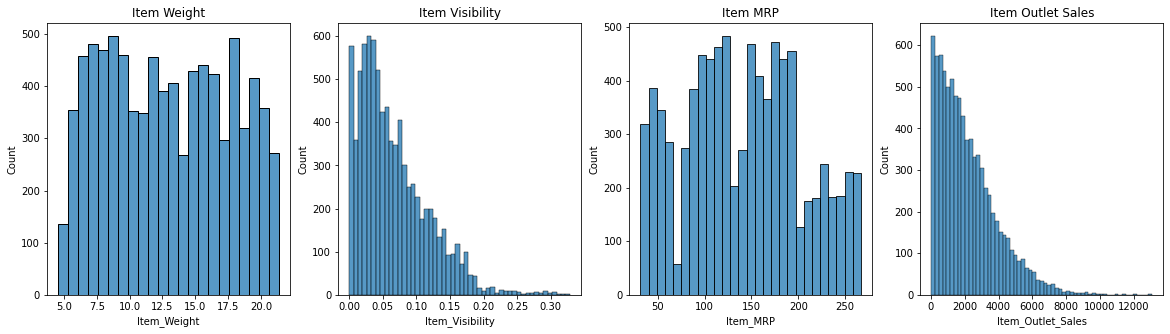

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5), sharex=False, sharey=False)

sns.histplot(df['Item_Weight'], ax=axes[0])
axes[0].set_title('Item Weight')

sns.histplot(df['Item_Visibility'], ax=axes[1])
axes[1].set_title('Item Visibility')

sns.histplot(df['Item_MRP'], ax=axes[2])
axes[2].set_title('Item MRP')

sns.histplot(df['Item_Outlet_Sales'], ax=axes[3])
axes[3].set_title('Item Outlet Sales');

In [15]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [16]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1199
Household                 910
Frozen Foods              855
Dairy                     681
Canned                    649
Baking Goods              647
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [17]:
df['Quantity_Sold']=round(df['Item_Outlet_Sales']/df['Item_MRP'],0) # Estimation of the quantity sold of the product. It is assumed that the list price already includes taxes
df['Quantity_Sold']=df['Quantity_Sold'].astype('int')

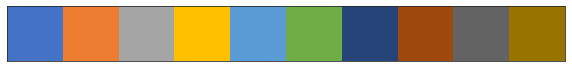

In [18]:
### Estilo de los graficos
sns.set_style('white')

### Paleta de colores Excel
my_palette=['#4472C4', '#ED7D31', '#A5A5A5', '#FFC000', '#5B9BD5', '#70AD47', '#264478', '#9E480E', '#636363', '#997300'] # Colores de Microsoft Excel
sns.palplot(sns.color_palette(my_palette, 10))

### Definir paleta
sns.set_palette(my_palette)

In [19]:
# Change categories
df.loc[df['Item_Fat_Content']=='reg', 'Item_Fat_Content']='Regular'
df.loc[df['Item_Fat_Content']=='low fat', 'Item_Fat_Content']='Low Fat'
df.loc[df['Item_Fat_Content']=='LF', 'Item_Fat_Content']='Low Fat'

### Number of products sold by fat content
df1=df.groupby(['Item_Fat_Content'])[['Quantity_Sold']].sum()
df1=df1.reset_index()
df1.head()

,Item_Fat_Content,Quantity_Sold
0,Low Fat,84533
1,Regular,46838


In [20]:
# !pip install gwpy matplotlib~=3.5.0

[Text(0, 0, '84533'), Text(0, 0, '46838')]

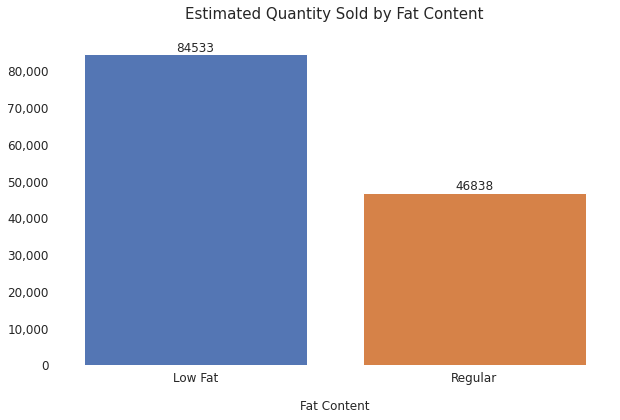

In [21]:
plt.figure(figsize=(10, 6))
p1=sns.barplot(data=df1, x='Item_Fat_Content', y='Quantity_Sold')
plt.title('Estimated Quantity Sold by Fat Content', fontsize=15, pad=20)
plt.ylabel('')
plt.yticks(np.arange(0, max(df1['Quantity_Sold'])+1, 10000), fontsize=12)
plt.xlabel('Fat Content', fontsize=12, labelpad=15) 
plt.xticks(fontsize=12)
sns.despine(left=True, bottom=True)
p1.set_yticklabels('{:,.0f}'.format(x) for x in p1.get_yticks())
plt.bar_label(p1.containers[0], fontsize=12)

# More low-fat related products are sold, although there may also be more products in this category.

In [22]:
df.groupby(['Item_Fat_Content'])[['Item_Identifier']].nunique()

,Item_Identifier
Item_Fat_Content,
Low Fat,1007
Regular,548


In [23]:
### Number of products sold by outlet
df2=df.groupby(['Outlet_Identifier'])[['Quantity_Sold']].sum()
df2=df2.reset_index()
df2=df2.sort_values(by=['Quantity_Sold'], ascending=False)
df2

,Outlet_Identifier,Quantity_Sold
5,OUT027,24789
6,OUT035,15779
9,OUT049,15472
2,OUT017,15427
8,OUT046,15054
1,OUT013,14910
7,OUT045,14467
3,OUT018,12859
0,OUT010,1323
4,OUT019,1291


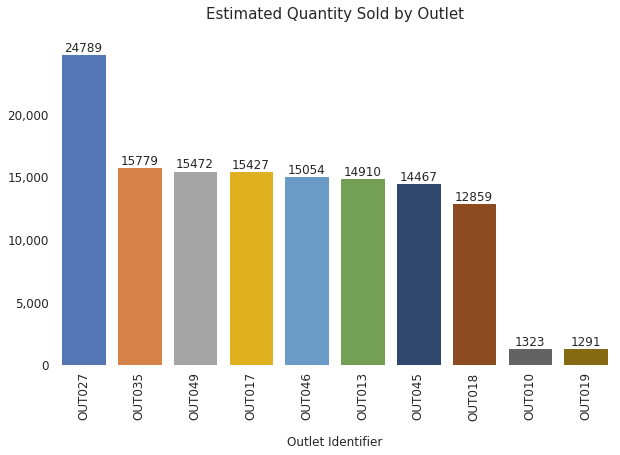

In [24]:
plt.figure(figsize=(10, 6))
p2=sns.barplot(data=df2, x='Outlet_Identifier', y='Quantity_Sold')
plt.title('Estimated Quantity Sold by Outlet', fontsize=15, pad=20)
plt.ylabel('')
plt.yticks(np.arange(0, max(df2['Quantity_Sold'])+1, 5000), fontsize=12)
plt.xlabel('Outlet Identifier', fontsize=12, labelpad=15) 
plt.xticks(fontsize=12, rotation=90)
sns.despine(left=True, bottom=True)
p2.set_yticklabels('{:,.0f}'.format(x) for x in p2.get_yticks())
plt.bar_label(p2.containers[0], fontsize=12);

# The OUT027 outlet is the one that has sold the most products, while the OUT010 and OUT019 outlet are the ones that have sold the least.

In [25]:
### Average product visibility and quantity sold 
df3=df.groupby(['Item_Identifier', 'Item_Fat_Content']).agg({'Item_Visibility': 'mean',
                                         'Quantity_Sold': 'sum'})
df3=df3.reset_index()
df3.head(10)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Quantity_Sold
0,DRA12,Low Fat,0.031956,78
1,DRA24,Regular,0.048062,96
2,DRA59,Regular,0.134718,113
3,DRB01,Low Fat,0.082126,24
4,DRB13,Regular,0.008002,64
5,DRB24,Low Fat,0.020624,79
6,DRB25,Low Fat,0.077305,93
7,DRB48,Regular,0.023700,112
8,DRC01,Regular,0.019219,105
9,DRC12,Low Fat,0.037893,47


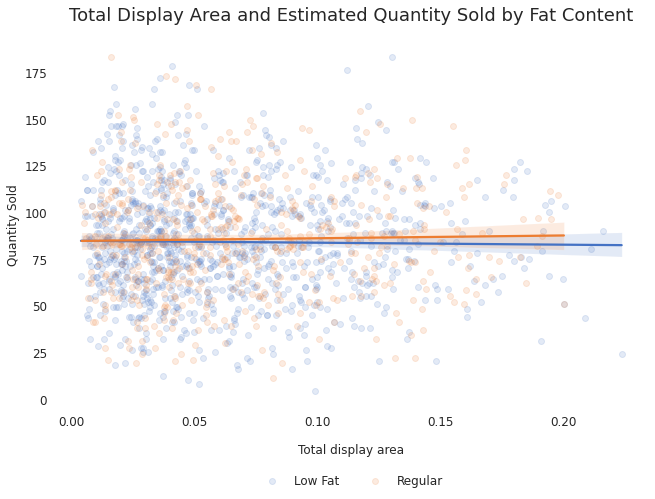

In [26]:
p3=sns.lmplot(data=df3, x="Item_Visibility", y="Quantity_Sold",
              scatter=True, scatter_kws={'alpha':0.15},
              hue='Item_Fat_Content',
              legend=False)
plt.title('Total Display Area and Estimated Quantity Sold by Fat Content', fontsize=18, pad=20)
plt.legend(title=None,
           loc='upper center',
           bbox_to_anchor=(0.5, -0.15),
           ncol=2,
           frameon=False,
           fontsize=12)
plt.ylabel('Quantity Sold', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Total display area', fontsize=12, labelpad=15)
plt.xticks(fontsize=12)
sns.despine(left=True, bottom=True)
plt.gcf().set_size_inches(10, 6);

# There appears to be no relationship between the total display area and the estimated quantity sold.

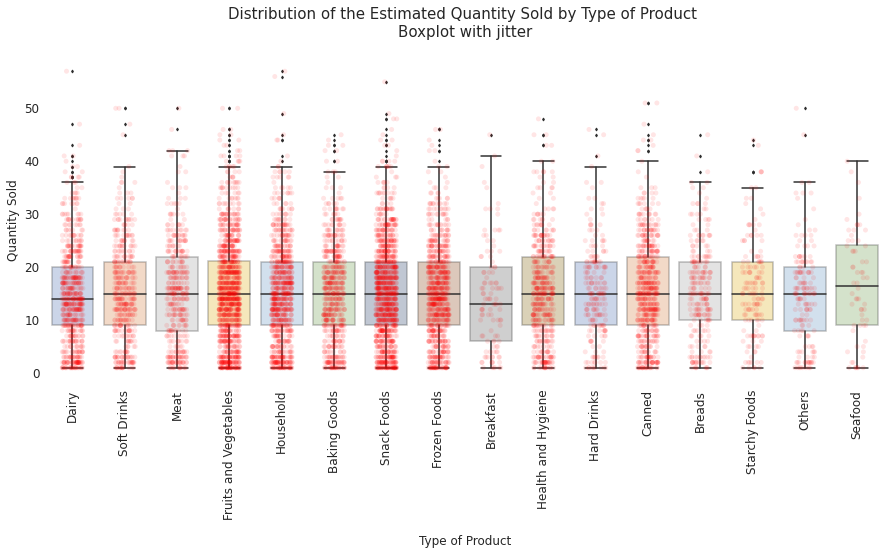

In [27]:
sns.boxplot(data=df, x='Item_Type', y='Quantity_Sold', 
            palette=my_palette,
            fliersize=2,
            boxprops=dict(alpha=.3))
sns.stripplot(data=df, x='Item_Type', y='Quantity_Sold', color='r', jitter=0.2, alpha=0.1)
plt.title('Distribution of the Estimated Quantity Sold by Type of Product \nBoxplot with jitter', fontsize=15, pad=20)
plt.ylabel('Quantity Sold', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Type of Product', fontsize=12, labelpad=15)
plt.xticks(fontsize=12, rotation=90)
sns.despine(left=True, bottom=True)
plt.gcf().set_size_inches(15, 6);

# Boxplot with jitter
# Fruits, vegetables, snacks foods and frozen foods have the highest purchase frequency, while seafood has the lowest purchase records.
# It can be seen that the median of the quantity sold throughout the different establishments and types of products is 15 units. 

In [28]:
df.groupby(['Item_Type'])[['Quantity_Sold']].median()

,Quantity_Sold
Item_Type,
Baking Goods,15.0
Breads,15.0
Breakfast,13.0
Canned,15.0
Dairy,14.0
Frozen Foods,15.0
Fruits and Vegetables,15.0
Hard Drinks,15.0
Health and Hygiene,15.0


In [29]:
### Histograms to see the distribution of various features in the data set
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Quantity_Sold
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,15
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,9
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,15
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,4
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,18


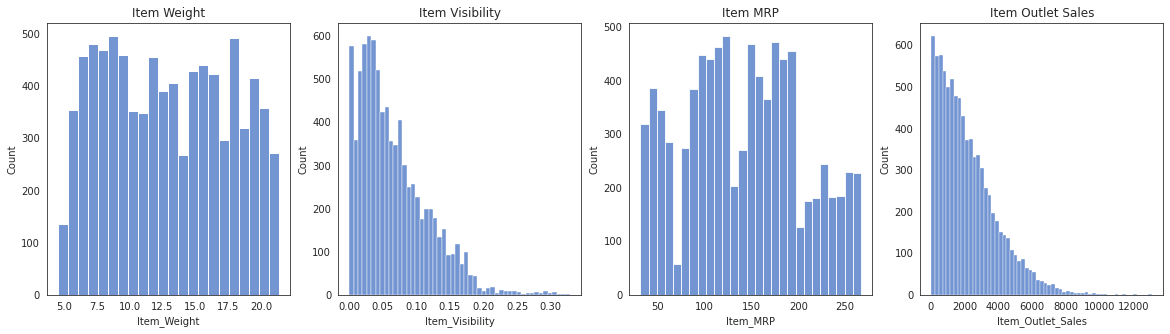

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5), sharex=False, sharey=False)

sns.histplot(df['Item_Weight'], ax=axes[0])
axes[0].set_title('Item Weight')

sns.histplot(df['Item_Visibility'], ax=axes[1])
axes[1].set_title('Item Visibility')

sns.histplot(df['Item_MRP'], ax=axes[2])
axes[2].set_title('Item MRP')

sns.histplot(df['Item_Outlet_Sales'], ax=axes[3])
axes[3].set_title('Item Outlet Sales');

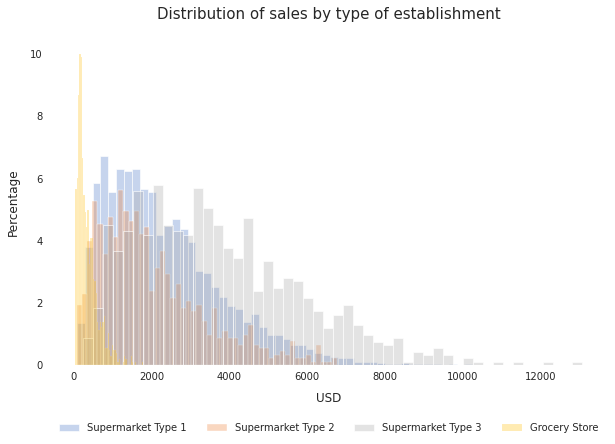

In [31]:
# Distribution of sales by type of establishment
sns.histplot(data=df[df['Outlet_Type']=='Supermarket Type1'], x='Item_Outlet_Sales', stat='percent', bins=50, color=my_palette[0], alpha=0.3, label='Supermarket Type 1')
sns.histplot(data=df[df['Outlet_Type']=='Supermarket Type2'], x='Item_Outlet_Sales', stat='percent', bins=50, color=my_palette[1], alpha=0.3, label='Supermarket Type 2')
sns.histplot(data=df[df['Outlet_Type']=='Supermarket Type3'], x='Item_Outlet_Sales', stat='percent', bins=50, color=my_palette[2], alpha=0.3, label='Supermarket Type 3')
sns.histplot(data=df[df['Outlet_Type']=='Grocery Store'], x='Item_Outlet_Sales', stat='percent', bins=50, color=my_palette[3], alpha=0.3, label='Grocery Store')

plt.title('Distribution of sales by type of establishment', fontsize=15, pad=20)
plt.legend(title=None,
           loc='upper center',
           bbox_to_anchor=(0.5, -0.15),
           ncol=4,
           frameon=False)
plt.ylabel('Percentage', fontsize=12, labelpad=10)
plt.xlabel('USD', fontsize=12, labelpad=10)
sns.despine(left=True, bottom=True)
plt.gcf().set_size_inches(10, 6);

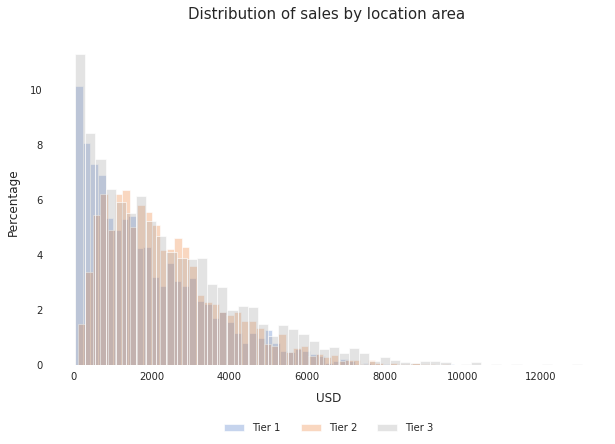

In [32]:
# Distribution of sales by location area 
sns.histplot(data=df[df['Outlet_Location_Type']=='Tier 1'], x='Item_Outlet_Sales', stat='percent', bins=50, color=my_palette[0], alpha=0.3, label='Tier 1')
sns.histplot(data=df[df['Outlet_Location_Type']=='Tier 2'], x='Item_Outlet_Sales', stat='percent', bins=50, color=my_palette[1], alpha=0.3, label='Tier 2')
sns.histplot(data=df[df['Outlet_Location_Type']=='Tier 3'], x='Item_Outlet_Sales', stat='percent', bins=50, color=my_palette[2], alpha=0.3, label='Tier 3')

plt.title('Distribution of sales by location area ', fontsize=15, pad=20)
plt.legend(title=None,
           loc='upper center',
           bbox_to_anchor=(0.5, -0.15),
           ncol=3,
           frameon=False)
plt.ylabel('Percentage', fontsize=12, labelpad=10)
plt.xlabel('USD', fontsize=12, labelpad=10)
sns.despine(left=True, bottom=True)
plt.gcf().set_size_inches(10, 6);

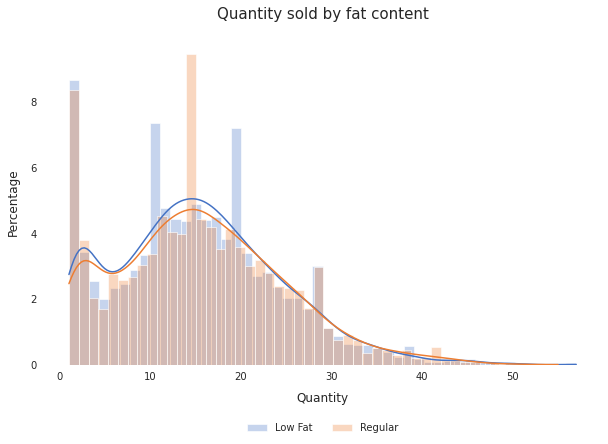

In [33]:
# Quantity sold by fat content
sns.histplot(data=df[df['Item_Fat_Content']=='Low Fat'], x='Quantity_Sold', stat='percent', kde=True, bins=50, color=my_palette[0], alpha=0.3, label='Low Fat')
sns.histplot(data=df[df['Item_Fat_Content']=='Regular'], x='Quantity_Sold', stat='percent', kde=True, bins=50, color=my_palette[1], alpha=0.3, label='Regular')

plt.title('Quantity sold by fat content', fontsize=15, pad=20)
plt.legend(title=None,
           loc='upper center',
           bbox_to_anchor=(0.5, -0.15),
           ncol=3,
           frameon=False)
plt.ylabel('Percentage', fontsize=12, labelpad=10)
plt.xlabel('Quantity', fontsize=12, labelpad=10)
sns.despine(left=True, bottom=True)
plt.gcf().set_size_inches(10, 6);

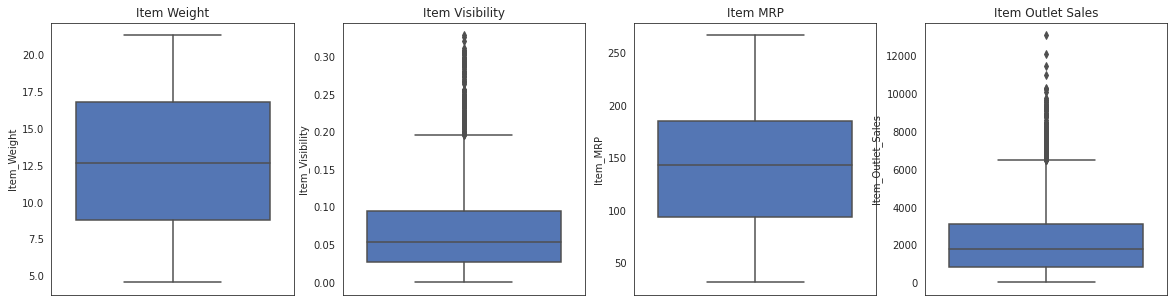

In [34]:
#### Box plots to view statistical summaries of various features in the dataset
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5), sharex=False, sharey=False)

sns.boxplot(data=df, y='Item_Weight', orient='v', ax=axes[0])
axes[0].set_title('Item Weight')

sns.boxplot(data=df, y='Item_Visibility', orient='v', ax=axes[1])
axes[1].set_title('Item Visibility')

sns.boxplot(data=df, y='Item_MRP', orient='v', ax=axes[2])
axes[2].set_title('Item MRP')

sns.boxplot(data=df, y='Item_Outlet_Sales', orient='v', ax=axes[3])
axes[3].set_title('Item Outlet Sales');

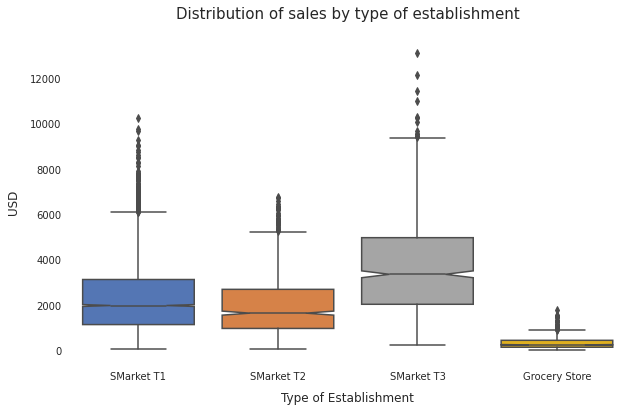

In [35]:
# Distribution of sales by type of establishment
sns.boxplot(data=df,
            x='Outlet_Type', y='Item_Outlet_Sales',
            order=['Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3', 'Grocery Store'],
            notch=True)
plt.title('Distribution of sales by type of establishment', fontsize=15, pad=20)
plt.ylabel('USD', fontsize=12, labelpad=10)
plt.xlabel('Type of Establishment', fontsize=12, labelpad=10)
plt.xticks([0, 1, 2, 3], ['SMarket T1', 'SMarket T2', 'SMarket T3', 'Grocery Store'])
sns.despine(left=True, bottom=True)
plt.gcf().set_size_inches(10, 6);

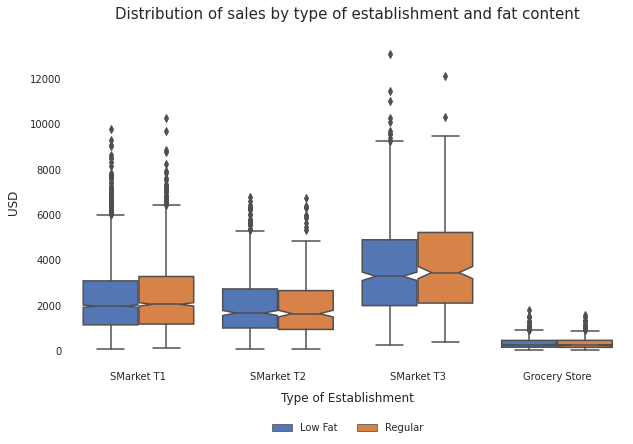

In [36]:
# Distribution of sales by type of establishment and fat content
sns.boxplot(data=df,
            x='Outlet_Type', y='Item_Outlet_Sales',
            order=['Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3', 'Grocery Store'],
            notch=True,
            hue='Item_Fat_Content')
plt.title('Distribution of sales by type of establishment and fat content', fontsize=15, pad=20)
plt.ylabel('USD', fontsize=12, labelpad=10)
plt.xlabel('Type of Establishment', fontsize=12, labelpad=10)
plt.xticks([0, 1, 2, 3], ['SMarket T1', 'SMarket T2', 'SMarket T3', 'Grocery Store'])
sns.despine(left=True, bottom=True)
plt.gcf().set_size_inches(10, 6)

plt.legend(title=None,
           loc='upper center',
           bbox_to_anchor=(0.5, -0.15),
           ncol=3,
           frameon=False);

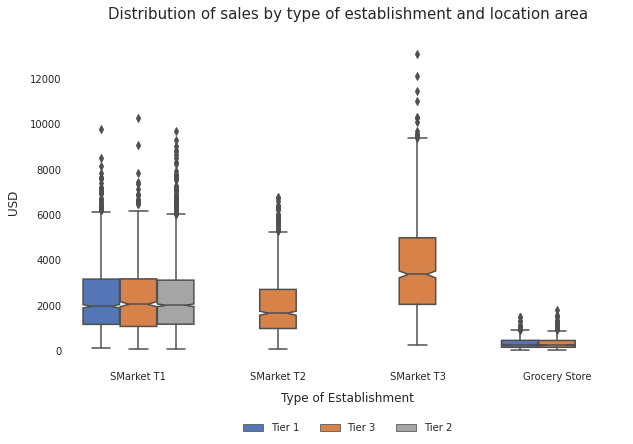

In [37]:
# Distribution of sales by type of establishment and location area
sns.boxplot(data=df,
            x='Outlet_Type', y='Item_Outlet_Sales',
            order=['Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3', 'Grocery Store'],
            notch=True,
            hue='Outlet_Location_Type')
plt.title('Distribution of sales by type of establishment and location area', fontsize=15, pad=20)
plt.ylabel('USD', fontsize=12, labelpad=10)
plt.xlabel('Type of Establishment', fontsize=12, labelpad=10)
plt.xticks([0, 1, 2, 3], ['SMarket T1', 'SMarket T2', 'SMarket T3', 'Grocery Store'])
sns.despine(left=True, bottom=True)
plt.gcf().set_size_inches(10, 6)

plt.legend(title=None,
           loc='upper center',
           bbox_to_anchor=(0.5, -0.15),
           ncol=3,
           frameon=False);

In [49]:
### Bonus: heatmaps of feature correlations
num_cols=df.loc[:, df.columns != 'Outlet_Establishment_Year'].select_dtypes([np.number]).columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'Quantity_Sold'],
      dtype='object')

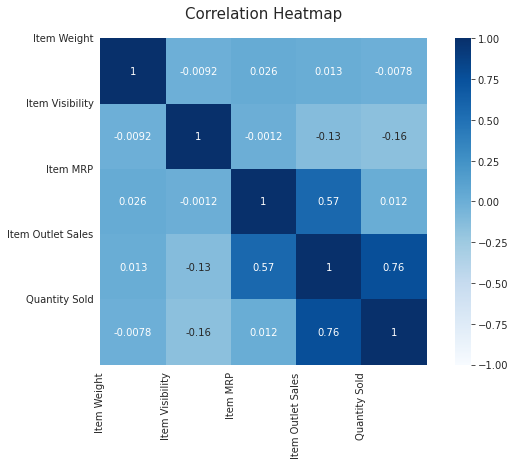

In [56]:
# Heatmap: Correlation Matrix
# https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
# https://towardsdatascience.com/heatmap-basics-with-pythons-seaborn-fb92ea280a6c

fig, ax=plt.subplots(nrows=1, ncols=1)

sns.heatmap(df[num_cols].corr(), 
            vmin=-1, vmax=1, 
            annot=True, 
            cmap='Blues',
            square=True)
ticks=['Item Weight', 'Item Visibility', 'Item MRP', 'Item Outlet Sales', 'Quantity Sold'] # Labels
plt.yticks(np.arange(len(ticks)), labels=ticks)
plt.xticks(np.arange(len(ticks)), labels=ticks)
plt.title('Correlation Heatmap', fontsize=15, pad=20)
plt.gcf().set_size_inches(10, 6);